<a href="https://colab.research.google.com/github/danielfce01/Grupo12_UDAKI/blob/main/Comprension_limpieza_datos/1_UDAKI_preparacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LESION RENAL AGUDA (ACUTE KIDNEY INJURY AKI)**

La lesión renal aguda (AKI, por sus siglas en inglés) es una complicación quirúrgica común que aumenta significativamente la morbilidad, la mortalidad y los costos hospitalarios

**Objetivo**

Desarrollar modelos de clasificacion para predecir la probabilidad de presentar AKI en los primeros 7 días del post operatorio


Comparar el rendimiento de los modelos para predecir la aparición AKI post operatoria



**Importar librerias**

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gestion de librerias
from importlib import reload
import sys

# Matemáticas y estadísticas
import scipy.stats as stats
import math

# Preparación de datos
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

**CONJUNTO DE DATOS**

Cohorte de 500 pacientes llevados  a cirugía no cardiaca en los que se determino  la incidencia a y los factores de riesgo de AKI post operatoria  

In [2]:
# cargar el conjunto de datos
df = pd.read_excel('/content/UDAKI.xlsx', sheet_name='IN362023IncidenciaYF_DATA_LABEL')

In [3]:
df.head(2)

,edad,sexo,talla corporal,Peso corporal,IMC mayor a 30,DM2,HTA,IC cronica,IAM,ERC,...,estadio 2 por creatinina,estadio 2 por GU,estadio 3 por creatinina,estadio 3 por GU,estadio 3 por TRR,LRA POP (choice=No presento),TRR hasta 7 dias POP,dias de estancia hospitalaria,muerte relacionada con LRA a 28 dias,muerte por cualquier causa a 28 dias
0,75,Masculino,160.0,45.0,No,No,No,No,No,No,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,No,22.0,NaN,NaN
1,71,Femenino,165.0,90.0,Si,Yes,Yes,No,No,No,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,No,60.0,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 42 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   edad                                               500 non-null    int64  
 1   sexo                                               500 non-null    object 
 2   talla corporal                                     480 non-null    float64
 3   Peso corporal                                      482 non-null    float64
 4   IMC mayor a 30                                     500 non-null    object 
 5   DM2                                                500 non-null    object 
 6   HTA                                                500 non-null    object 
 7    IC cronica                                        500 non-null    object 
 8   IAM                                                499 non-null    object 
 9   ERC       

In [5]:
df.columns

Index(['edad', 'sexo', 'talla corporal', 'Peso corporal', 'IMC mayor a 30',
       'DM2', 'HTA', ' IC cronica', 'IAM', 'ERC', 'Neoplasia',
       'cirrosis hepatica', 'EPOC', 'sepsis',
       'contraste endovenoso en los 7 días prequirurgicos', 'rabdomiolisis ',
       'crisis hipertensiva ', 'choque hipovolemico ',
       'falla cardiaca descompensada ', 'proteinuria preoperatoria', 'ARA II',
       'IECA', ' ASA', 'prioridad de cirugía', 'tipo de cirugía',
       'UCI POP inmediato', 'Sangrado mayor 500cc',
       'Transfusion hemoderivados', 'Uso vasopresores', 'Creatinina POP',
       'estadio 1 por creatinina', 'estadio 1 por GU',
       'estadio 2 por creatinina', 'estadio 2 por GU',
       'estadio 3 por creatinina', 'estadio 3 por GU', 'estadio 3 por TRR',
       'LRA POP (choice=No presento)', ' TRR hasta 7 dias POP',
       'dias de estancia hospitalaria', 'muerte relacionada con LRA a 28 dias',
       'muerte por cualquier causa a 28 dias'],
      dtype='object')

**Limpieza de datos**

La base de datos se construyo en Redcap

**REDCap (Research Electronic Data Capture)** es una plataforma segura y basada en web diseñada para capturar, gestionar y almacenar datos de investigación, especialmente en entornos académicos, clínicos y científicos. Fue desarrollado por la Universidad de Vanderbilt y es ampliamente usado en estudios médicos, epidemiológicos y ensayos clínicos.

La base de datos final se exporta a un archivo excel

In [6]:
# Eliminar las columnas Record ID, Hospital de practicas y Numero de historia clinica
# Estas columnas se eliminaron del archico de excel antes de subir el archivo para mantener la privacidad de los pacientes
# df = df.drop(['Record ID', 'Hospital de practicas', 'Numero de historia clinica'], axis=1, inplace=True)


**Preparacion de los datos**




In [7]:
# Datos faltantes
df.isnull().sum()

,0
edad,0
sexo,0
talla corporal,20
Peso corporal,18
IMC mayor a 30,0
DM2,0
HTA,0
IC cronica,0
IAM,1
ERC,0


In [8]:
# crear un data frame con los datos faltantes
df_missing = df.isnull().sum().reset_index()
df_missing.columns = ['Variable', 'Missing_Count']
df_missing = df_missing[df_missing['Missing_Count'] > 0]
df_missing

,Variable,Missing_Count
2,talla corporal,20
3,Peso corporal,18
8,IAM,1
11,cirrosis hepatica,6
14,contraste endovenoso en los 7 días prequirurgicos,1
18,falla cardiaca descompensada,2
19,proteinuria preoperatoria,1
20,ARA II,1
21,IECA,1
25,UCI POP inmediato,1


In [9]:
# prompt: contar los valores en la variable proteinuria preoperatoria

df['proteinuria preoperatoria'].value_counts()

,count
proteinuria preoperatoria,
Indeterminado,386
No,53
Yes,37
Si,23


**muerte relacionda con LRA 28 dias** tiene gran cantidad de valores nulos

El objetivo del modelo es predecir AKI y no mortalidad

Decido eliminar las variables asociadas a muerte a 28 dias

In [10]:
df = df.drop(columns=['muerte por cualquier causa a 28 dias', 'muerte relacionada con LRA a 28 dias'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   edad                                               500 non-null    int64  
 1   sexo                                               500 non-null    object 
 2   talla corporal                                     480 non-null    float64
 3   Peso corporal                                      482 non-null    float64
 4   IMC mayor a 30                                     500 non-null    object 
 5   DM2                                                500 non-null    object 
 6   HTA                                                500 non-null    object 
 7    IC cronica                                        500 non-null    object 
 8   IAM                                                499 non-null    object 
 9   ERC       

En la variable **sangrado mayor a 500 cc** faltan 119 datos

La imputacion de esta varible es dificil por que el sangrado durante una cirugia esta relacionado a factores del paciente como al tipo de cirugia .  No se puede imputar por la moda , ni por vecinos cercanos

La informacion de esta variable esta relacionada con la tranfusion y el uso de vasopresores

Los pacientes que se trasfunden son los que sangran mas de 500 cc durante la cirugia y estan con soporte vasopresor

Por esta razon se elimina la varible sangrado

In [12]:
# Eliminar la variable sangrado mayor a 500 cc
df = df.drop(['Sangrado mayor 500cc'], axis=1) # Removed the extra space at the end of the column name

En las variables **estadios**

Unchecked significa NO

Checked signifca si

Realizo de una vez una **dumificacion manual**

Unchecked significa NO  = 0

Checked signifca si  = 1


In [13]:
# Replace "Unchecked" with 0.0 and "Checked" with 1.0 in specified columns
cols_to_replace = ['estadio 1 por creatinina', 'estadio 1 por GU', 'estadio 2 por creatinina',
                   'estadio 2 por GU', 'estadio 3 por creatinina', 'estadio 3 por GU', 'estadio 3 por TRR']

for col in cols_to_replace:
    df[col] = df[col].replace({'Unchecked': 0.0, 'Checked': 1.0})


In [14]:
df.head(2)

,edad,sexo,talla corporal,Peso corporal,IMC mayor a 30,DM2,HTA,IC cronica,IAM,ERC,...,estadio 1 por creatinina,estadio 1 por GU,estadio 2 por creatinina,estadio 2 por GU,estadio 3 por creatinina,estadio 3 por GU,estadio 3 por TRR,LRA POP (choice=No presento),TRR hasta 7 dias POP,dias de estancia hospitalaria
0,75,Masculino,160.0,45.0,No,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Checked,No,22.0
1,71,Femenino,165.0,90.0,Si,Yes,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Checked,No,60.0


En la varibale **LRA POP (choice=No presento)**

Checked significa que no presento AKI

Unchecked significa que si presento AKI

Se cambian los valores para mejorar la comprension

Nombre de la varible:  LRA

Checked = 0

Unchecked = 1



In [15]:
#cambiar el nombre de la columna LRA POP (choice=No presento) por LRA , y los valores de la variable Checked  por 0 como float y Unchecked por 1 como float

# Rename the column
df = df.rename(columns={'LRA POP (choice=No presento)': 'LRA'})

# Replace values in the 'LRA' and 'Checked' columns
df['LRA'] = df['LRA'].replace({'Checked': 0.0, 'Unchecked': 1.0})



In [16]:
df.head(2)

,edad,sexo,talla corporal,Peso corporal,IMC mayor a 30,DM2,HTA,IC cronica,IAM,ERC,...,estadio 1 por creatinina,estadio 1 por GU,estadio 2 por creatinina,estadio 2 por GU,estadio 3 por creatinina,estadio 3 por GU,estadio 3 por TRR,LRA,TRR hasta 7 dias POP,dias de estancia hospitalaria
0,75,Masculino,160.0,45.0,No,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,22.0
1,71,Femenino,165.0,90.0,Si,Yes,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,60.0


**Imputaciones**

In [17]:
#Lista de variables numericas
numCols = df.select_dtypes(include = ["int", 'float']).columns.tolist()
df[numCols].head(2)

,edad,talla corporal,Peso corporal,Creatinina POP,estadio 1 por creatinina,estadio 1 por GU,estadio 2 por creatinina,estadio 2 por GU,estadio 3 por creatinina,estadio 3 por GU,estadio 3 por TRR,LRA,dias de estancia hospitalaria
0,75,160.0,45.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,71,165.0,90.0,0.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [18]:
# prompt: realiza un describe de las varibales numericas

# Describir las variables numéricas
df[numCols].describe()


,edad,talla corporal,Peso corporal,Creatinina POP,estadio 1 por creatinina,estadio 1 por GU,estadio 2 por creatinina,estadio 2 por GU,estadio 3 por creatinina,estadio 3 por GU,estadio 3 por TRR,LRA,dias de estancia hospitalaria
count,500.000000,480.000000,482.000000,498.000000,500.0000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000
mean,57.364000,163.939583,67.199170,1.063715,0.1000,0.0,0.038000,0.002000,0.030000,0.028000,0.028000,0.194000,20.783567
std,20.217344,9.628078,14.796111,0.945550,0.3003,0.0,0.191388,0.044721,0.170758,0.165138,0.165138,0.395825,17.085459
min,18.000000,130.000000,29.000000,0.240000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,41.000000,157.750000,58.000000,0.630000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,60.000000,165.000000,65.000000,0.790000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,73.250000,170.000000,75.000000,1.087500,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
max,95.000000,192.000000,111.000000,9.230000,1.0000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000


In [19]:
# Identificación de valores nulos para las variables numéricas
for col in df[numCols]:
    print (col, np.sum(pd.isnull(df[col])))

edad 0
talla corporal 20
Peso corporal 18
Creatinina POP 2
estadio 1 por creatinina 0
estadio 1 por GU 0
estadio 2 por creatinina 0
estadio 2 por GU 0
estadio 3 por creatinina 0
estadio 3 por GU 0
estadio 3 por TRR 0
LRA 0
dias de estancia hospitalaria 1


En las variables **talla corporal** ,  **peso corporal** y **Creatinina POP**¨reemplazar los valores nulos por la mediana

In [20]:
# En las variables talla corporal y peso corporal reemplazar los valores nulos por la mediana
df['talla corporal'] = df['talla corporal'].fillna(df['talla corporal'].median())
df['Peso corporal'] = df['Peso corporal'].fillna(df['Peso corporal'].median())
df['Creatinina POP'] = df['Creatinina POP'].fillna(df['Creatinina POP'].median())

In [21]:
# Identificación de valores nulos para las variables numéricas
for col in df[numCols]:
    print (col, np.sum(pd.isnull(df[col])))

edad 0
talla corporal 0
Peso corporal 0
Creatinina POP 0
estadio 1 por creatinina 0
estadio 1 por GU 0
estadio 2 por creatinina 0
estadio 2 por GU 0
estadio 3 por creatinina 0
estadio 3 por GU 0
estadio 3 por TRR 0
LRA 0
dias de estancia hospitalaria 1


In [22]:
# eliminar los datos nulos en numCols
df.dropna(subset=numCols, inplace=True)


In [23]:
#Lista de variables categóricas
catCols = df.select_dtypes(include = ["object", 'category']).columns.tolist()
df[catCols].head(2)

,sexo,IMC mayor a 30,DM2,HTA,IC cronica,IAM,ERC,Neoplasia,cirrosis hepatica,EPOC,...,proteinuria preoperatoria,ARA II,IECA,ASA,prioridad de cirugía,tipo de cirugía,UCI POP inmediato,Transfusion hemoderivados,Uso vasopresores,TRR hasta 7 dias POP
0,Masculino,No,No,No,No,No,No,Yes,No,No,...,No,No,No,ASA III,Sensible al tiempo,Abdominal,No,No,No,No
1,Femenino,Si,Yes,Yes,No,No,No,No,No,Yes,...,Si,No,No,ASA III,Emergente,Abdominal,Yes,No,Yes,No


In [24]:
# Identificación de valores nulos para las variables numéricas
for col in df[catCols]:
    print (col, np.sum(pd.isnull(df[col])))

sexo 0
IMC mayor a 30 0
DM2 0
HTA 0
 IC cronica 0
IAM 1
ERC 0
Neoplasia 0
cirrosis hepatica 6
EPOC 0
sepsis 0
contraste endovenoso en los 7 días prequirurgicos 1
rabdomiolisis  0
crisis hipertensiva  0
choque hipovolemico  0
falla cardiaca descompensada  2
proteinuria preoperatoria 1
ARA II 1
IECA 1
 ASA 0
prioridad de cirugía 0
tipo de cirugía 0
UCI POP inmediato 1
Transfusion hemoderivados 1
Uso vasopresores 1
 TRR hasta 7 dias POP 0


En las variables categoricas hay pocos valores nulos por lo que decido eliminarlos

In [25]:
# eliminar los valores nulos en catCols
df.dropna(subset=catCols, inplace=True)

# Verify that null values have been removed
for col in catCols:
    print(col, np.sum(pd.isnull(df[col])))


sexo 0
IMC mayor a 30 0
DM2 0
HTA 0
 IC cronica 0
IAM 0
ERC 0
Neoplasia 0
cirrosis hepatica 0
EPOC 0
sepsis 0
contraste endovenoso en los 7 días prequirurgicos 0
rabdomiolisis  0
crisis hipertensiva  0
choque hipovolemico  0
falla cardiaca descompensada  0
proteinuria preoperatoria 0
ARA II 0
IECA 0
 ASA 0
prioridad de cirugía 0
tipo de cirugía 0
UCI POP inmediato 0
Transfusion hemoderivados 0
Uso vasopresores 0
 TRR hasta 7 dias POP 0


Se comprueba los datos nulos en todo el conjunto de datos

In [26]:
# datos nulos en df
df.isnull().sum()

,0
edad,0
sexo,0
talla corporal,0
Peso corporal,0
IMC mayor a 30,0
DM2,0
HTA,0
IC cronica,0
IAM,0
ERC,0


En cuanto se redujo el conjunto de datos ?

In [27]:
df.shape

(486, 39)

**Guardar el conjunto de datos**

In [28]:
# guardar df
df.to_csv('aki.csv', index=False)  # Save as CSV
df.to_excel('aki.xlsx', index=False) # Save as Excel



In [29]:
# cargar conjunto de datos
df = pd.read_excel('/content/aki.xlsx')

In [30]:
df.head(2)

,edad,sexo,talla corporal,Peso corporal,IMC mayor a 30,DM2,HTA,IC cronica,IAM,ERC,...,estadio 1 por creatinina,estadio 1 por GU,estadio 2 por creatinina,estadio 2 por GU,estadio 3 por creatinina,estadio 3 por GU,estadio 3 por TRR,LRA,TRR hasta 7 dias POP,dias de estancia hospitalaria
0,75,Masculino,160,45,No,No,No,No,No,No,...,0,0,0,0,0,0,0,0,No,22
1,71,Femenino,165,90,Si,Yes,Yes,No,No,No,...,0,0,0,0,0,0,0,0,No,60


Se elimino la variable **proteinuria preoperatoria** debido a que en el analisis estadistico no se asocio a AKI

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 39 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   edad                                               486 non-null    int64  
 1   sexo                                               486 non-null    object 
 2   talla corporal                                     486 non-null    int64  
 3   Peso corporal                                      486 non-null    int64  
 4   IMC mayor a 30                                     486 non-null    object 
 5   DM2                                                486 non-null    object 
 6   HTA                                                486 non-null    object 
 7    IC cronica                                        486 non-null    object 
 8   IAM                                                486 non-null    object 
 9   ERC       

In [32]:
#lista de las columnas
df.columns

Index(['edad', 'sexo', 'talla corporal', 'Peso corporal', 'IMC mayor a 30',
       'DM2', 'HTA', ' IC cronica', 'IAM', 'ERC', 'Neoplasia',
       'cirrosis hepatica', 'EPOC', 'sepsis',
       'contraste endovenoso en los 7 días prequirurgicos', 'rabdomiolisis ',
       'crisis hipertensiva ', 'choque hipovolemico ',
       'falla cardiaca descompensada ', 'proteinuria preoperatoria', 'ARA II',
       'IECA', ' ASA', 'prioridad de cirugía', 'tipo de cirugía',
       'UCI POP inmediato', 'Transfusion hemoderivados', 'Uso vasopresores',
       'Creatinina POP', 'estadio 1 por creatinina', 'estadio 1 por GU',
       'estadio 2 por creatinina', 'estadio 2 por GU',
       'estadio 3 por creatinina', 'estadio 3 por GU', 'estadio 3 por TRR',
       'LRA', ' TRR hasta 7 dias POP', 'dias de estancia hospitalaria'],
      dtype='object')

**Visualizacion de los datos**

Variables de entrada

In [33]:
#Lista de variables categóricas
catCols = df.select_dtypes(include = ["object", 'category']).columns.tolist()
df[catCols].head(2)

,sexo,IMC mayor a 30,DM2,HTA,IC cronica,IAM,ERC,Neoplasia,cirrosis hepatica,EPOC,...,proteinuria preoperatoria,ARA II,IECA,ASA,prioridad de cirugía,tipo de cirugía,UCI POP inmediato,Transfusion hemoderivados,Uso vasopresores,TRR hasta 7 dias POP
0,Masculino,No,No,No,No,No,No,Yes,No,No,...,No,No,No,ASA III,Sensible al tiempo,Abdominal,No,No,No,No
1,Femenino,Si,Yes,Yes,No,No,No,No,No,Yes,...,Si,No,No,ASA III,Emergente,Abdominal,Yes,No,Yes,No


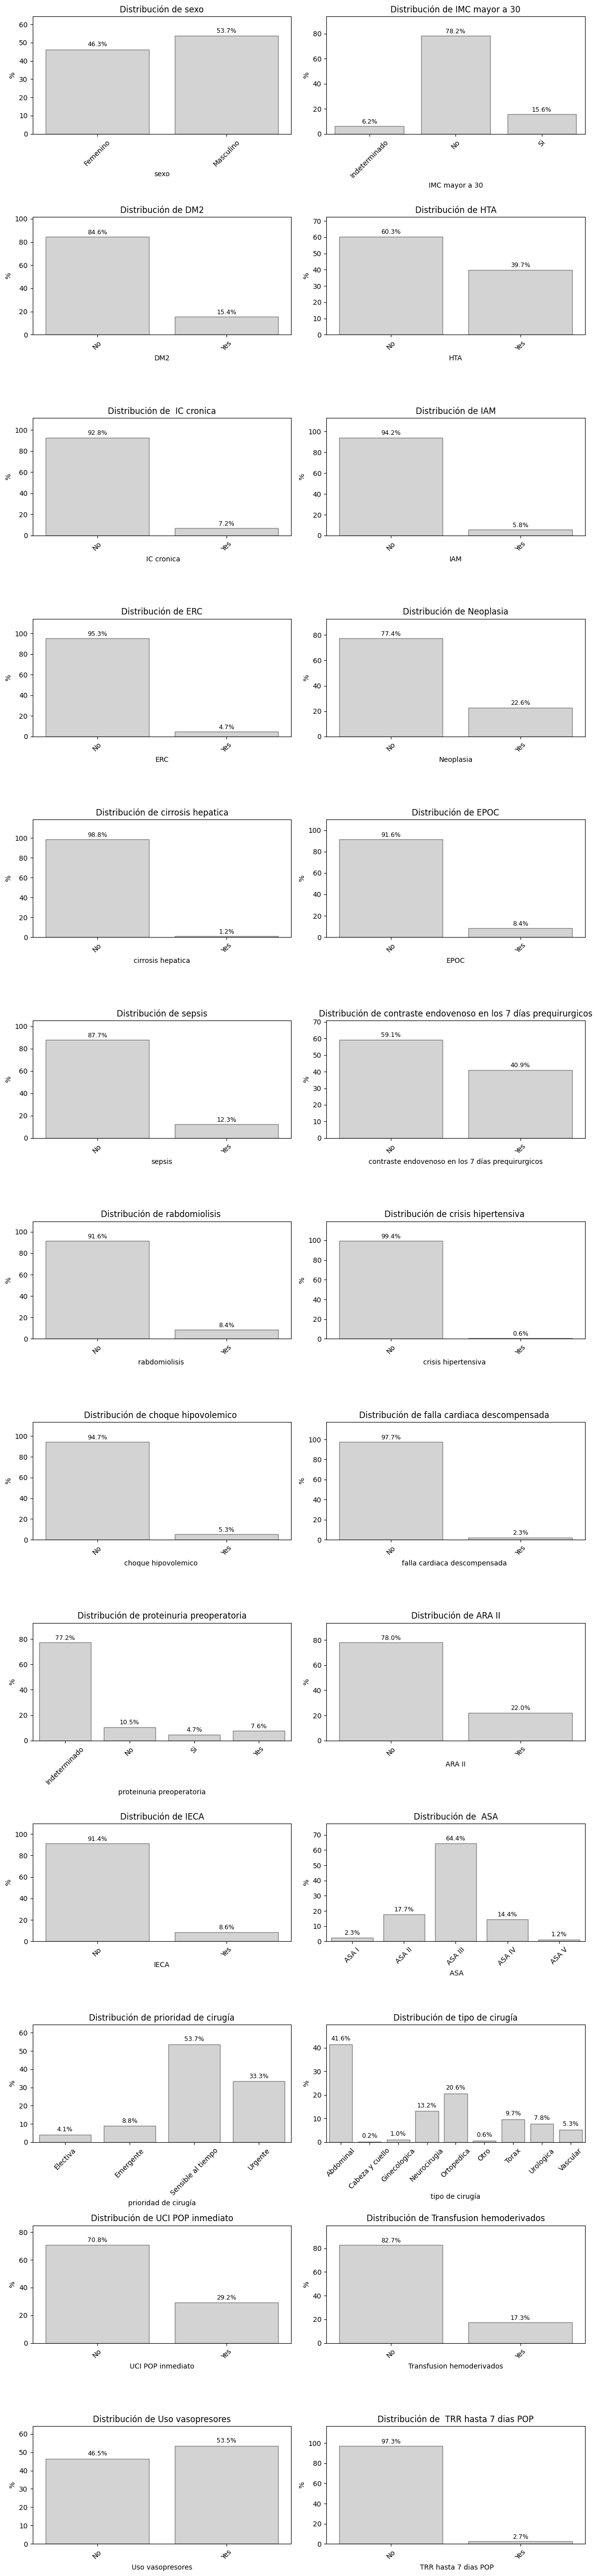

In [34]:
n = len(catCols)
cols = 2  # número de columnas fijas
rows = math.ceil(n / cols)  # calcular número de filas necesarias

# Crear subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
axes = axes.flatten()

# Graficar
for i, col in enumerate(catCols):
    ax = axes[i]
    counts = df[col].value_counts(normalize=True).sort_index() * 100
    sns.barplot(x=counts.index, y=counts.values, ax=ax,
                color='lightgray', edgecolor='gray')

    ax.set_title(f'Distribución de {col}')
    ax.set_ylabel('%')
    ax.set_ylim(0, counts.max() * 1.2)
    for j, p in enumerate(counts.values):
        ax.text(j, p + 1, f'{p:.1f}%', ha='center', va='bottom', fontsize=9)
    ax.tick_params(axis='x', rotation=45)

# Ocultar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

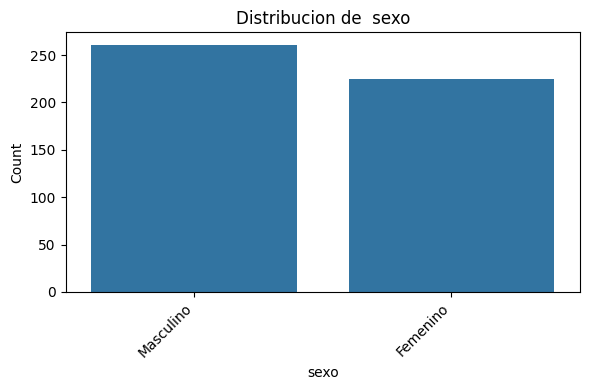

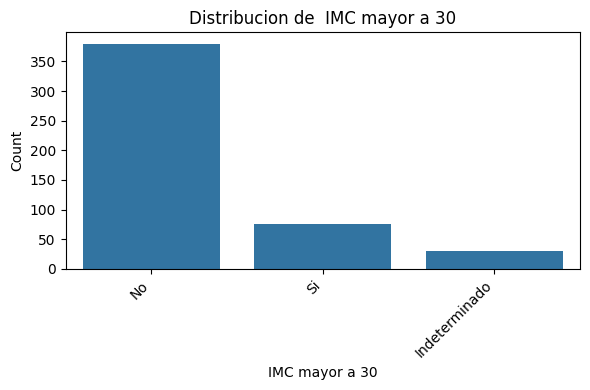

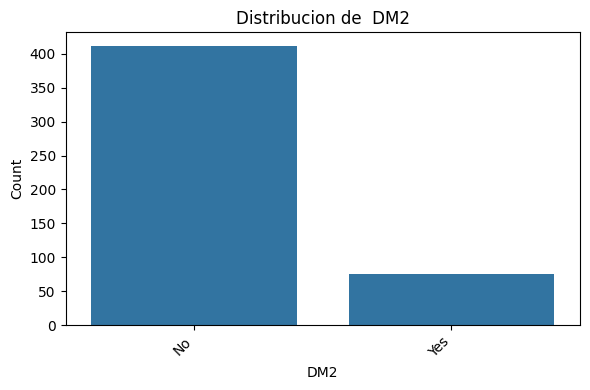

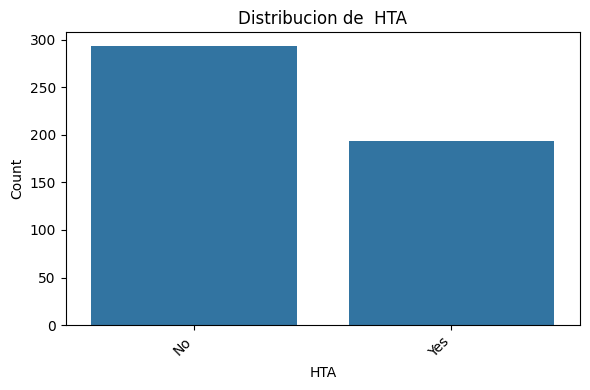

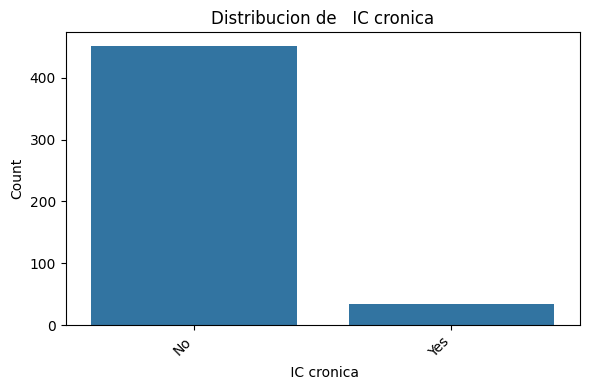

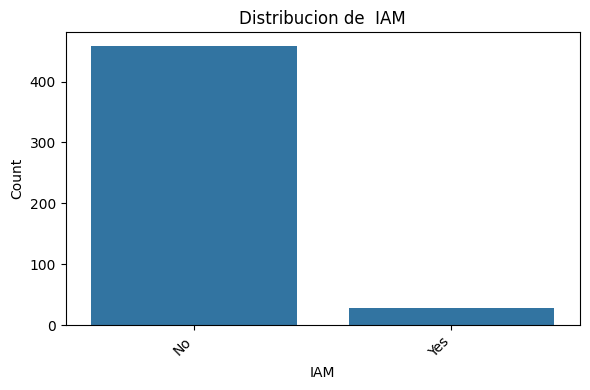

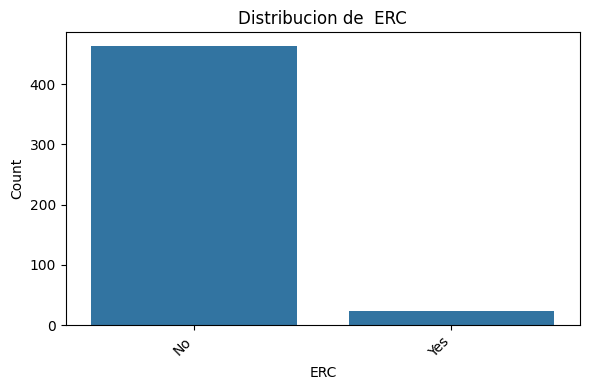

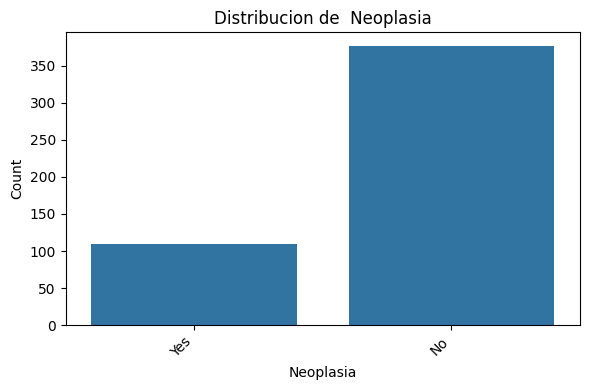

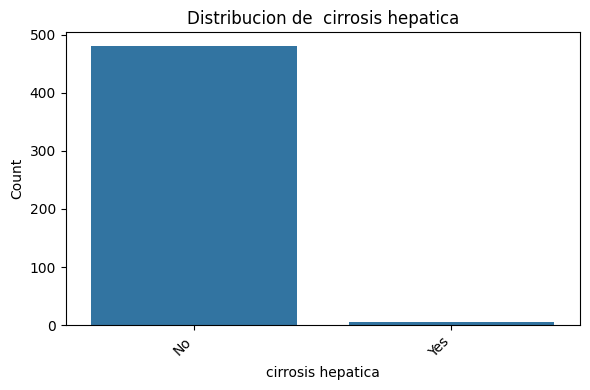

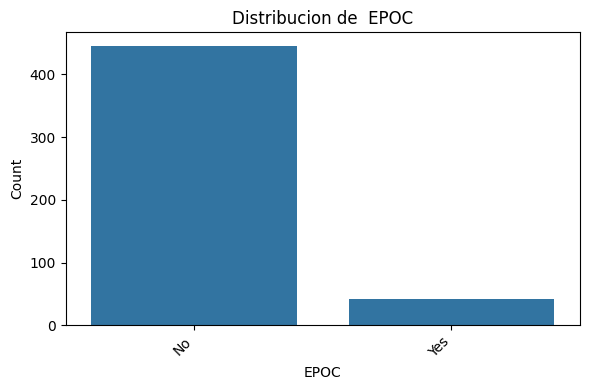

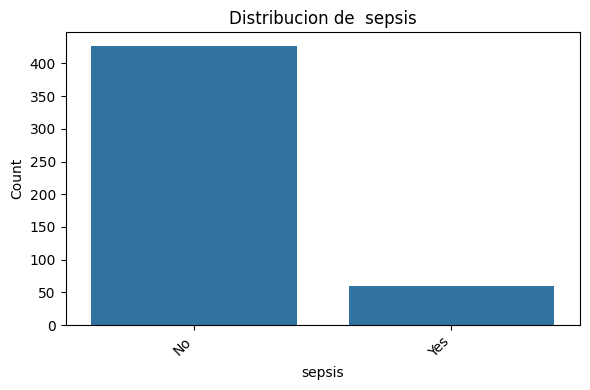

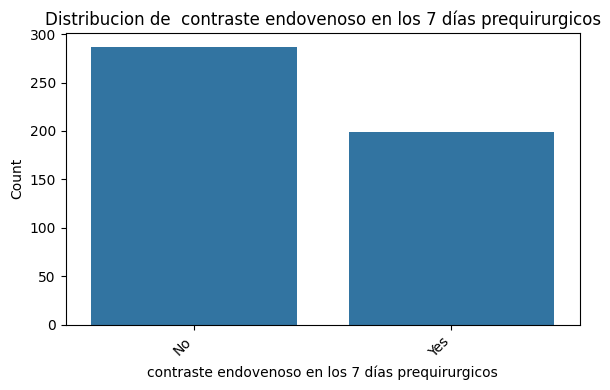

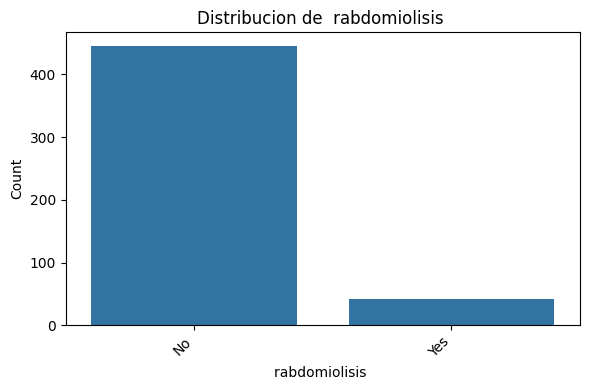

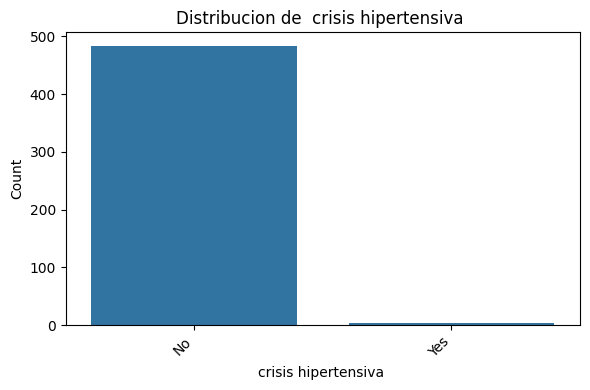

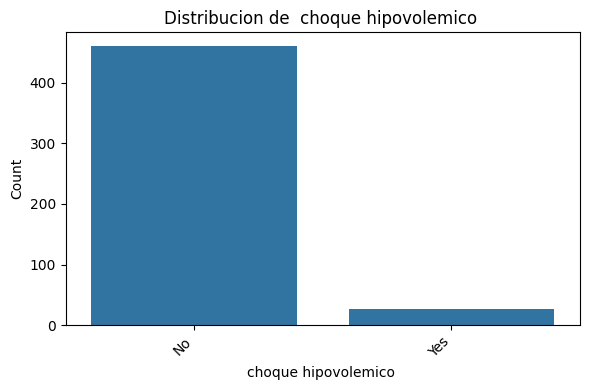

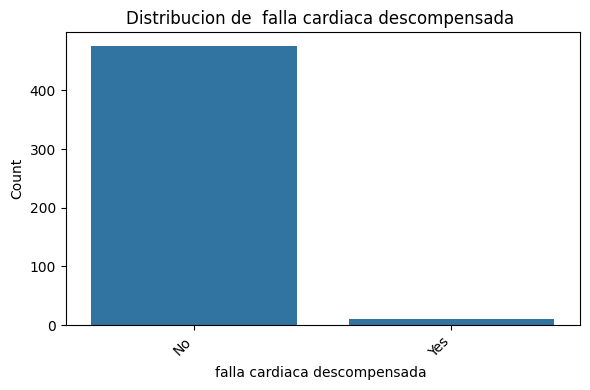

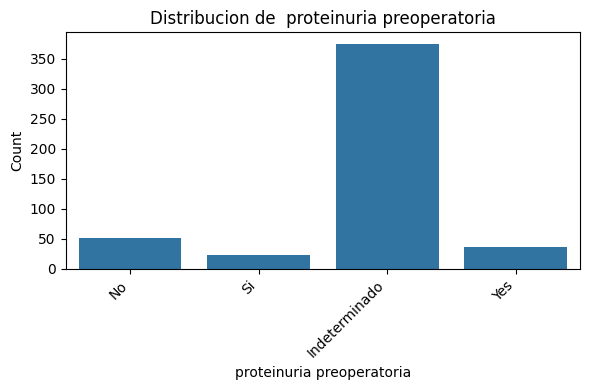

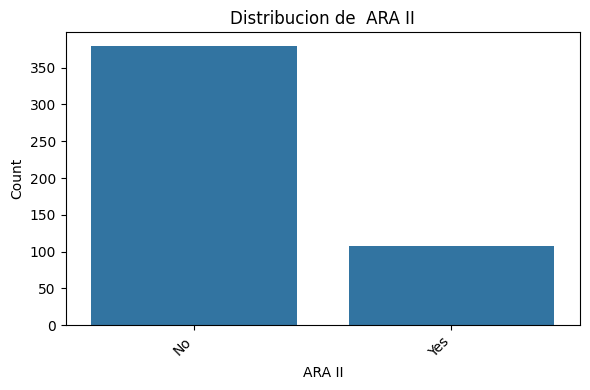

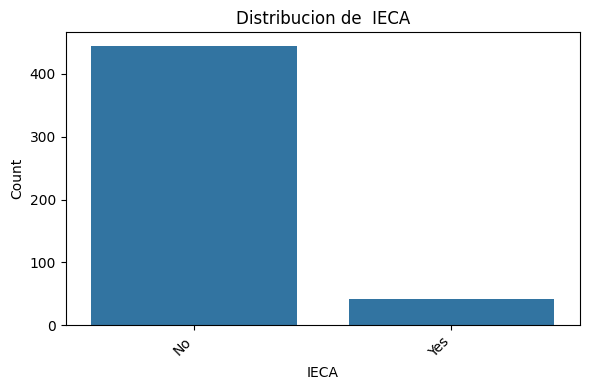

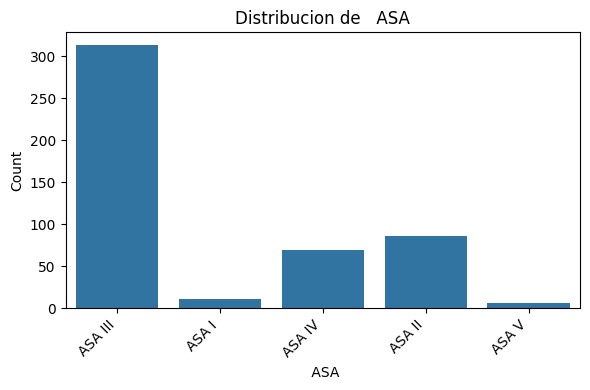

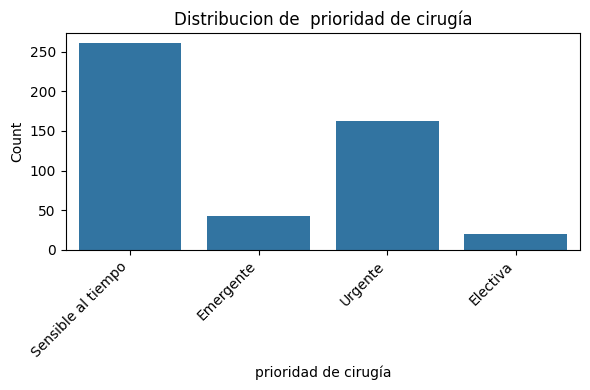

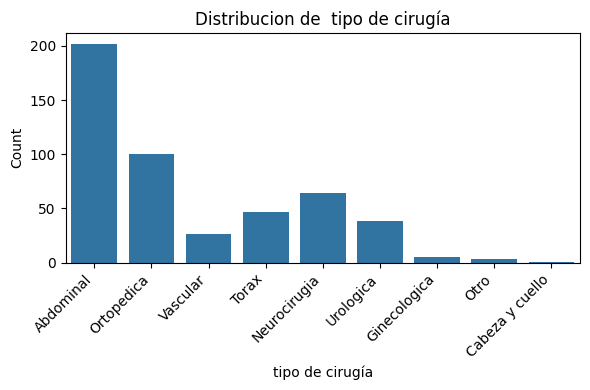

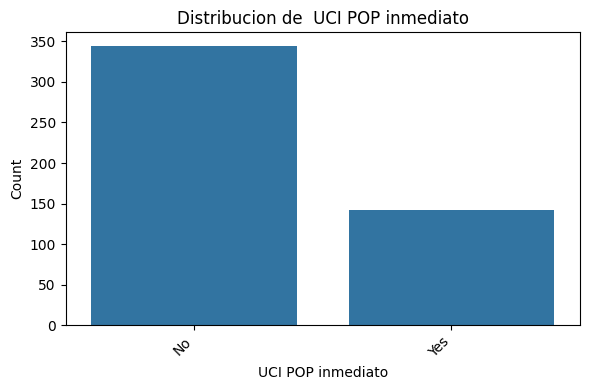

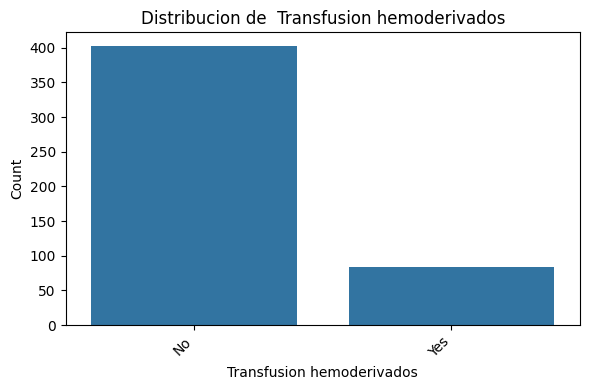

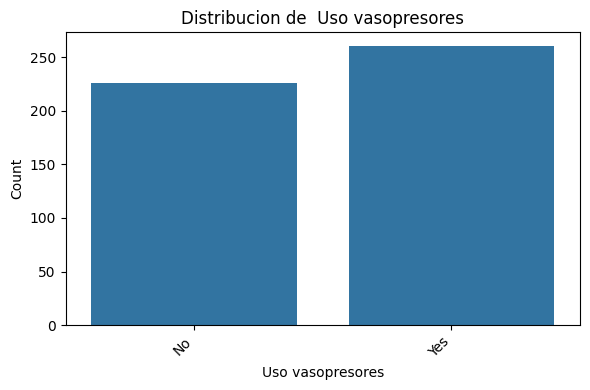

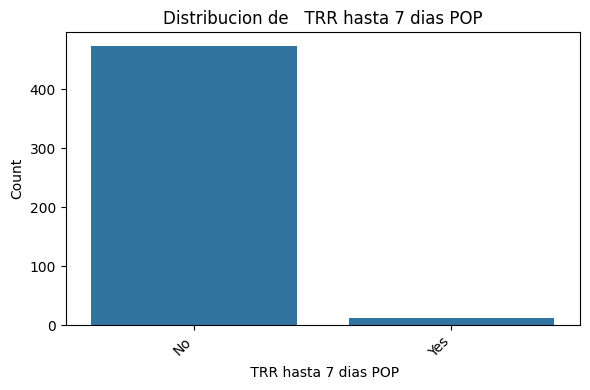

In [35]:
#Visualización de frecuencia de instancias para variables categóricas
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' and 'catCols' are defined as in the provided code

for col in catCols:
    plt.figure(figsize=(6, 4))  # Adjust figure size as needed
    sns.countplot(x=col, data=df)
    plt.title(f'Distribucion de  {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()


In [36]:
# Distribución de cada variable categórica en el conjunto de datos
for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(df[col].value_counts())
    print()

===== sexo ====================
sexo
Masculino    261
Femenino     225
Name: count, dtype: int64

===== IMC mayor a 30 ====================
IMC mayor a 30
No               380
Si                76
Indeterminado     30
Name: count, dtype: int64

===== DM2 ====================
DM2
No     411
Yes     75
Name: count, dtype: int64

===== HTA ====================
HTA
No     293
Yes    193
Name: count, dtype: int64

=====  IC cronica ====================
 IC cronica
No     451
Yes     35
Name: count, dtype: int64

===== IAM ====================
IAM
No     458
Yes     28
Name: count, dtype: int64

===== ERC ====================
ERC
No     463
Yes     23
Name: count, dtype: int64

===== Neoplasia ====================
Neoplasia
No     376
Yes    110
Name: count, dtype: int64

===== cirrosis hepatica ====================
cirrosis hepatica
No     480
Yes      6
Name: count, dtype: int64

===== EPOC ====================
EPOC
No     445
Yes     41
Name: count, dtype: int64

===== sepsis ============

Solo hay 3 pacientes con diagnostico de crisis hipertensiva

se elimina esta variable

In [37]:
# Eliminar la variable 'crisis hipertensiva'
#df = df.drop('crisis hipertensiva ', axis=1)


In [38]:
#Lista de variables numéricas
numCols=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
df[numCols].head(2)

,edad,talla corporal,Peso corporal,Creatinina POP,estadio 1 por creatinina,estadio 1 por GU,estadio 2 por creatinina,estadio 2 por GU,estadio 3 por creatinina,estadio 3 por GU,estadio 3 por TRR,LRA,dias de estancia hospitalaria
0,75,160,45,0.64,0,0,0,0,0,0,0,0,22
1,71,165,90,0.76,0,0,0,0,0,0,0,0,60


In [39]:
#Separo las variables objetivos de la lista de variables numericas
y= df[["estadio 1 por GU","estadio 1 por creatinina","estadio 2 por creatinina","estadio 2 por GU" , "estadio 3 por creatinina", "estadio 3 por GU", "estadio 3 por TRR","LRA", "dias de estancia hospitalaria"]]
#numCols.remove([])

In [40]:
# remover las variables objetivo de las numericas
for col in ['estadio 1 por creatinina', "estadio 1 por GU","estadio 2 por creatinina", "estadio 2 por GU", "estadio 3 por creatinina", "estadio 3 por GU", "estadio 3 por TRR", "LRA", "dias de estancia hospitalaria"]:
    if col in numCols:  # Check if the column is in numCols before removing
        numCols.remove(col)
df[numCols].head(2)

,edad,talla corporal,Peso corporal,Creatinina POP
0,75,160,45,0.64
1,71,165,90,0.76


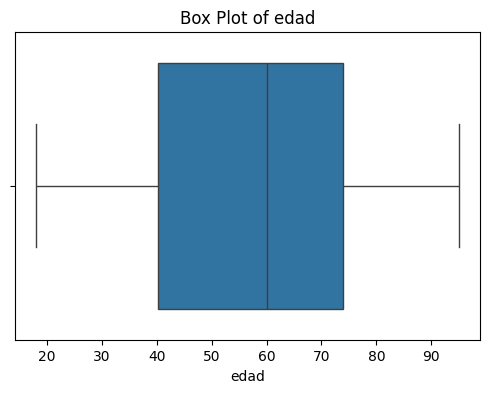

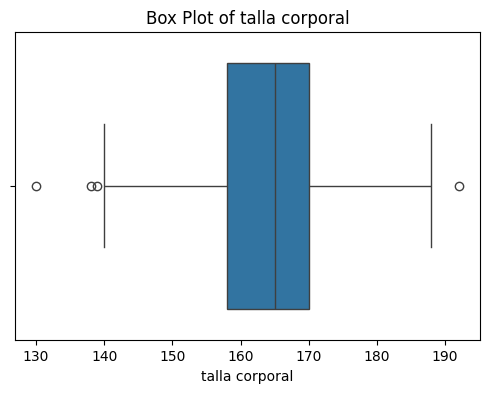

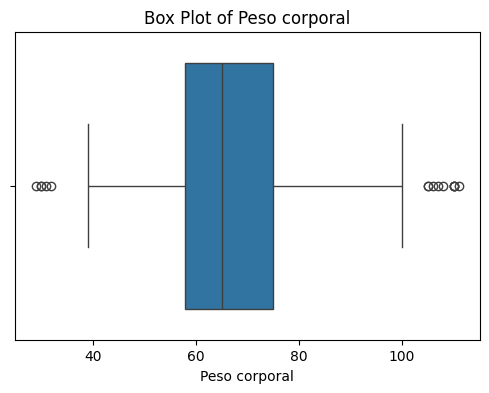

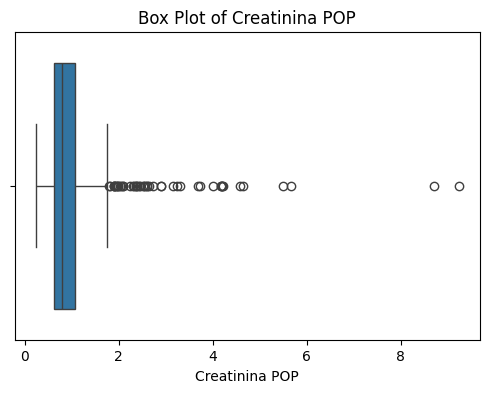

In [41]:
# box plot con numCols
for col in numCols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.show()


Variables de salida

Predecir LRA : si o no

Predecir el estadio : 1, 2 o 3

Predecir la necesidad de soporte renal

Predecir los  dias de estancia hospitalaria

In [42]:
salida = df[['estadio 1 por GU', 'estadio 1 por creatinina', 'estadio 2 por creatinina', 'estadio 2 por GU', 'estadio 3 por creatinina', 'estadio 3 por GU', 'estadio 3 por TRR', 'LRA', 'dias de estancia hospitalaria', " TRR hasta 7 dias POP"]]
salida.head(2)

,estadio 1 por GU,estadio 1 por creatinina,estadio 2 por creatinina,estadio 2 por GU,estadio 3 por creatinina,estadio 3 por GU,estadio 3 por TRR,LRA,dias de estancia hospitalaria,TRR hasta 7 dias POP
0,0,0,0,0,0,0,0,0,22,No
1,0,0,0,0,0,0,0,0,60,No


In [43]:
# se agrupan los estadios
import numpy as np
salida = salida.assign(
    aki_1=np.where((salida['estadio 1 por GU'] == 1) | (salida['estadio 1 por creatinina'] == 1), 1, 0),
    aki_2=np.where((salida['estadio 2 por GU'] == 1) | (salida['estadio 2 por creatinina'] == 1), 1, 0),
    aki_3=np.where(
        (salida['estadio 3 por creatinina'] == 1) | (salida['estadio 3 por GU'] == 1) | (salida['estadio 3 por TRR'] == 1),
        1,
        0,
    ),
)

In [44]:
salida.head(10)

,estadio 1 por GU,estadio 1 por creatinina,estadio 2 por creatinina,estadio 2 por GU,estadio 3 por creatinina,estadio 3 por GU,estadio 3 por TRR,LRA,dias de estancia hospitalaria,TRR hasta 7 dias POP,aki_1,aki_2,aki_3
0,0,0,0,0,0,0,0,0,22,No,0,0,0
1,0,0,0,0,0,0,0,0,60,No,0,0,0
2,0,0,1,0,0,0,0,1,18,No,0,1,0
3,0,0,0,0,0,0,0,0,8,No,0,0,0
4,0,0,0,0,0,0,0,0,16,No,0,0,0
5,0,1,0,0,0,0,0,1,37,No,1,0,0
6,0,0,0,0,0,0,0,0,115,No,0,0,0
7,0,0,0,0,0,0,0,0,55,No,0,0,0
8,0,0,0,0,0,0,0,0,10,No,0,0,0
9,0,0,0,0,0,0,0,0,18,No,0,0,0


Se confirma que se crearon las columnas adecuadamente

Evaluar valores nulos y duplicados

In [45]:
#Valores nulos en salida
salida.isnull().sum()

,0
estadio 1 por GU,0
estadio 1 por creatinina,0
estadio 2 por creatinina,0
estadio 2 por GU,0
estadio 3 por creatinina,0
estadio 3 por GU,0
estadio 3 por TRR,0
LRA,0
dias de estancia hospitalaria,0
TRR hasta 7 dias POP,0


In [46]:
#valores duplicados en salida
print(salida.duplicated().sum())


341


In [47]:
# eliminar estadio 1 por GU	estadio 1 por creatinina	estadio 2 por creatinina	estadio 2 por GU	estadio 3 por creatinina	estadio 3 por GU	estadio 3 por TRR
salida = salida.drop(columns=['estadio 1 por GU', 'estadio 1 por creatinina', 'estadio 2 por creatinina', 'estadio 2 por GU', 'estadio 3 por creatinina', 'estadio 3 por GU', 'estadio 3 por TRR'])
salida.head(10)


,LRA,dias de estancia hospitalaria,TRR hasta 7 dias POP,aki_1,aki_2,aki_3
0,0,22,No,0,0,0
1,0,60,No,0,0,0
2,1,18,No,0,1,0
3,0,8,No,0,0,0
4,0,16,No,0,0,0
5,1,37,No,1,0,0
6,0,115,No,0,0,0
7,0,55,No,0,0,0
8,0,10,No,0,0,0
9,0,18,No,0,0,0


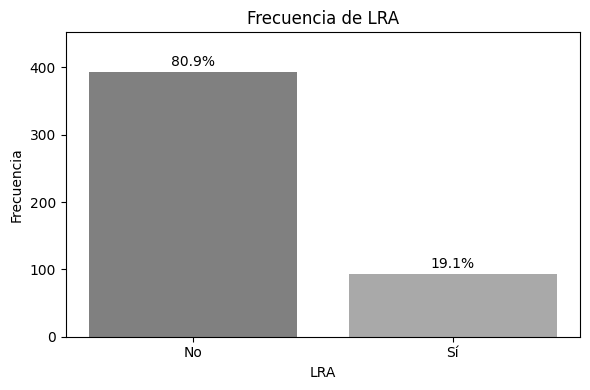

In [48]:
import matplotlib.pyplot as plt

# Calcular las frecuencias y porcentajes
lra_counts = salida['LRA'].value_counts()
lra_percentages = (lra_counts / lra_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
bars = plt.bar(lra_counts.index, lra_counts.values, color=['gray', 'darkgray'])

# Agregar etiquetas de porcentaje encima de las barras
for i, (count, percent) in enumerate(zip(lra_counts.values, lra_percentages)):
    plt.text(i, count + 5, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

# Etiquetas y estilo
plt.xlabel('LRA')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de LRA')
plt.xticks(lra_counts.index, ['No', 'Sí'])
plt.ylim(0, max(lra_counts.values) * 1.15)  # Espacio para los porcentajes

plt.tight_layout()
plt.show()


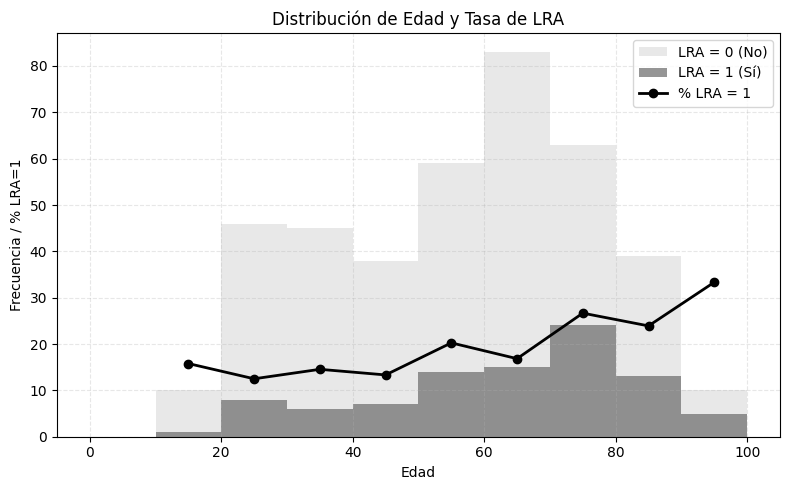

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Suponiendo que ya tienes df con columnas 'edad' y 'LRA'
# Agrupar edades en bins
bins = np.arange(0, df['edad'].max() + 10, 10)
df['edad_bin'] = pd.cut(df['edad'], bins)

# Calcular el porcentaje de LRA=1 en cada grupo de edad
grupo = df.groupby('edad_bin')
porcentaje_LRA1 = grupo['LRA'].mean() * 100
centros = [interval.mid for interval in porcentaje_LRA1.index.categories]

# Plot
plt.figure(figsize=(8, 5))

# Histograma en grises
plt.hist(df[df['LRA'] == 0]['edad'], bins=bins, alpha=0.5, color='lightgray', label='LRA = 0 (No)')
plt.hist(df[df['LRA'] == 1]['edad'], bins=bins, alpha=0.7, color='dimgray', label='LRA = 1 (Sí)')

# Línea de porcentaje de LRA=1
plt.plot(centros, porcentaje_LRA1, color='black', linewidth=2, marker='o', label='% LRA = 1')

# Ejes y títulos
plt.xlabel('Edad')
plt.ylabel('Frecuencia / % LRA=1')
plt.title('Distribución de Edad y Tasa de LRA')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [50]:
print(salida['LRA'].value_counts())
print(salida['aki_1'].value_counts())
print(salida['aki_2'].value_counts())
print(salida['aki_3'].value_counts())

LRA
0    393
1     93
Name: count, dtype: int64
aki_1
0    438
1     48
Name: count, dtype: int64
aki_2
0    466
1     20
Name: count, dtype: int64
aki_3
0    464
1     22
Name: count, dtype: int64


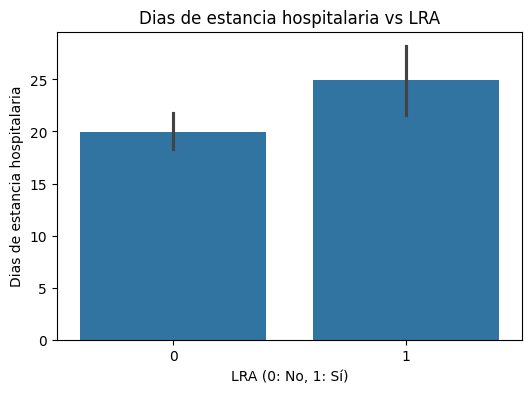

In [51]:
# grafico de barras entre LRA y dias de estancia hospitalaria
plt.figure(figsize=(6, 4))
sns.barplot(x='LRA', y='dias de estancia hospitalaria', data=salida)
plt.title('Dias de estancia hospitalaria vs LRA')
plt.xlabel('LRA (0: No, 1: Sí)')
plt.ylabel('Dias de estancia hospitalaria')
plt.show()


**Datos de prueba**

In [52]:
df.head(2)

,edad,sexo,talla corporal,Peso corporal,IMC mayor a 30,DM2,HTA,IC cronica,IAM,ERC,...,estadio 1 por GU,estadio 2 por creatinina,estadio 2 por GU,estadio 3 por creatinina,estadio 3 por GU,estadio 3 por TRR,LRA,TRR hasta 7 dias POP,dias de estancia hospitalaria,edad_bin
0,75,Masculino,160,45,No,No,No,No,No,No,...,0,0,0,0,0,0,0,No,22,"(70, 80]"
1,71,Femenino,165,90,Si,Yes,Yes,No,No,No,...,0,0,0,0,0,0,0,No,60,"(70, 80]"


In [53]:
salida.head(10)

,LRA,dias de estancia hospitalaria,TRR hasta 7 dias POP,aki_1,aki_2,aki_3
0,0,22,No,0,0,0
1,0,60,No,0,0,0
2,1,18,No,0,1,0
3,0,8,No,0,0,0
4,0,16,No,0,0,0
5,1,37,No,1,0,0
6,0,115,No,0,0,0
7,0,55,No,0,0,0
8,0,10,No,0,0,0
9,0,18,No,0,0,0


Combinar los conjuntos de datos df y salida en uno solo

In [54]:
# Drop specified columns from the 'df' DataFrame, but only if they exist.
cols_to_drop = ['estadio 1 por GU', 'estadio 1 por creatinina', 'estadio 2 por creatinina',
               'estadio 2 por GU', 'estadio 3 por creatinina', 'estadio 3 por GU',
               'estadio 3 por TRR', 'LRA', ' TRR hasta 7 dias POP', 'dias de estancia hospitalaria']

# Iterate through the list of columns to drop and drop only if they exist
for col in cols_to_drop:
    if col in df.columns:  # Check if column exists in DataFrame
        df = df.drop(columns=[col])  # Drop the column if it exists
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping.")

df.head(2)

,edad,sexo,talla corporal,Peso corporal,IMC mayor a 30,DM2,HTA,IC cronica,IAM,ERC,...,ARA II,IECA,ASA,prioridad de cirugía,tipo de cirugía,UCI POP inmediato,Transfusion hemoderivados,Uso vasopresores,Creatinina POP,edad_bin
0,75,Masculino,160,45,No,No,No,No,No,No,...,No,No,ASA III,Sensible al tiempo,Abdominal,No,No,No,0.64,"(70, 80]"
1,71,Femenino,165,90,Si,Yes,Yes,No,No,No,...,No,No,ASA III,Emergente,Abdominal,Yes,No,Yes,0.76,"(70, 80]"


In [55]:
df.columns

Index(['edad', 'sexo', 'talla corporal', 'Peso corporal', 'IMC mayor a 30',
       'DM2', 'HTA', ' IC cronica', 'IAM', 'ERC', 'Neoplasia',
       'cirrosis hepatica', 'EPOC', 'sepsis',
       'contraste endovenoso en los 7 días prequirurgicos', 'rabdomiolisis ',
       'crisis hipertensiva ', 'choque hipovolemico ',
       'falla cardiaca descompensada ', 'proteinuria preoperatoria', 'ARA II',
       'IECA', ' ASA', 'prioridad de cirugía', 'tipo de cirugía',
       'UCI POP inmediato', 'Transfusion hemoderivados', 'Uso vasopresores',
       'Creatinina POP', 'edad_bin'],
      dtype='object')

La variables **creatinina pop** se utiliza para el diagnostico de AKI por lo que su efecto ya esta incluido en la varible LRA

In [56]:
# eliminar la variable 'Creatinina POP'
if 'Creatinina POP' in df.columns:
    df = df.drop('Creatinina POP', axis=1)


In [57]:
df.head(2)

,edad,sexo,talla corporal,Peso corporal,IMC mayor a 30,DM2,HTA,IC cronica,IAM,ERC,...,proteinuria preoperatoria,ARA II,IECA,ASA,prioridad de cirugía,tipo de cirugía,UCI POP inmediato,Transfusion hemoderivados,Uso vasopresores,edad_bin
0,75,Masculino,160,45,No,No,No,No,No,No,...,No,No,No,ASA III,Sensible al tiempo,Abdominal,No,No,No,"(70, 80]"
1,71,Femenino,165,90,Si,Yes,Yes,No,No,No,...,Si,No,No,ASA III,Emergente,Abdominal,Yes,No,Yes,"(70, 80]"


In [58]:
# prompt: unir los conjuntos de datos df y salida

import pandas as pd
# Concatenate the dataframes
aki_final = pd.concat([df, salida], axis=1)

# Display the first few rows of the combined dataframe
aki_final.head()


,edad,sexo,talla corporal,Peso corporal,IMC mayor a 30,DM2,HTA,IC cronica,IAM,ERC,...,UCI POP inmediato,Transfusion hemoderivados,Uso vasopresores,edad_bin,LRA,dias de estancia hospitalaria,TRR hasta 7 dias POP,aki_1,aki_2,aki_3
0,75,Masculino,160,45,No,No,No,No,No,No,...,No,No,No,"(70, 80]",0,22,No,0,0,0
1,71,Femenino,165,90,Si,Yes,Yes,No,No,No,...,Yes,No,Yes,"(70, 80]",0,60,No,0,0,0
2,66,Femenino,160,90,Si,Yes,Yes,No,No,No,...,No,No,No,"(60, 70]",1,18,No,0,1,0
3,42,Femenino,160,80,No,No,No,No,No,No,...,No,No,Yes,"(40, 50]",0,8,No,0,0,0
4,88,Femenino,166,60,No,Yes,Yes,Yes,No,No,...,No,No,No,"(80, 90]",0,16,No,0,0,0


In [59]:
aki_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 35 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   edad                                               486 non-null    int64   
 1   sexo                                               486 non-null    object  
 2   talla corporal                                     486 non-null    int64   
 3   Peso corporal                                      486 non-null    int64   
 4   IMC mayor a 30                                     486 non-null    object  
 5   DM2                                                486 non-null    object  
 6   HTA                                                486 non-null    object  
 7    IC cronica                                        486 non-null    object  
 8   IAM                                                486 non-null    object  
 9  

Sigue apareciendo la variable crisis hipertensiva

In [60]:
# Value counts for each column in aki_final
for col in aki_final.columns:
    print(f"Value counts for column '{col}':")
    print(aki_final[col].value_counts())
    print("-" * 20)


Value counts for column 'edad':
edad
62    13
57    12
60    12
67    12
38    12
      ..
87     1
91     1
93     1
53     1
47     1
Name: count, Length: 77, dtype: int64
--------------------
Value counts for column 'sexo':
sexo
Masculino    261
Femenino     225
Name: count, dtype: int64
--------------------
Value counts for column 'talla corporal':
talla corporal
165    67
170    37
160    33
168    30
158    24
150    22
155    20
175    18
166    15
174    14
172    12
154    12
157    10
167    10
156     9
164     9
176     9
171     9
152     9
169     8
159     8
163     8
173     8
145     7
148     7
162     7
180     7
178     7
177     6
153     5
161     5
149     4
179     4
185     4
140     3
143     3
184     2
182     2
151     2
183     2
130     1
147     1
138     1
146     1
186     1
192     1
139     1
188     1
Name: count, dtype: int64
--------------------
Value counts for column 'Peso corporal':
Peso corporal
60    57
70    56
65    51
50    29
75    26
   

Crisis hipertensiva solo 3 valores positivos

Proteinuria preoperatoria con 375 datos indeterminados

Se eliminan del conjunto de datos

In [61]:
# Eliminar las variables 'crisis hipertensiva' y 'Proteinuria preoperatoria'
if 'crisis hipertensiva ' in aki_final.columns:
    aki_final = aki_final.drop('crisis hipertensiva ', axis=1)
if 'Proteinuria preoperatoria' in aki_final.columns:
    aki_final = aki_final.drop('Proteinuria preoperatoria', axis=1)


In [62]:
aki_final.columns

Index(['edad', 'sexo', 'talla corporal', 'Peso corporal', 'IMC mayor a 30',
       'DM2', 'HTA', ' IC cronica', 'IAM', 'ERC', 'Neoplasia',
       'cirrosis hepatica', 'EPOC', 'sepsis',
       'contraste endovenoso en los 7 días prequirurgicos', 'rabdomiolisis ',
       'choque hipovolemico ', 'falla cardiaca descompensada ',
       'proteinuria preoperatoria', 'ARA II', 'IECA', ' ASA',
       'prioridad de cirugía', 'tipo de cirugía', 'UCI POP inmediato',
       'Transfusion hemoderivados', 'Uso vasopresores', 'edad_bin', 'LRA',
       'dias de estancia hospitalaria', ' TRR hasta 7 dias POP', 'aki_1',
       'aki_2', 'aki_3'],
      dtype='object')

In [63]:
# se cambia el nombre de las columnas por minusculas y sin espacios
aki_final.columns = aki_final.columns.str.lower().str.replace(' ', '_')

In [64]:
aki_final.columns

Index(['edad', 'sexo', 'talla_corporal', 'peso_corporal', 'imc_mayor_a_30',
       'dm2', 'hta', '_ic_cronica', 'iam', 'erc', 'neoplasia',
       'cirrosis_hepatica', 'epoc', 'sepsis',
       'contraste_endovenoso_en_los_7_días_prequirurgicos', 'rabdomiolisis_',
       'choque_hipovolemico_', 'falla_cardiaca_descompensada_',
       'proteinuria_preoperatoria', 'ara_ii', 'ieca', '_asa',
       'prioridad_de_cirugía', 'tipo_de_cirugía', 'uci_pop_inmediato',
       'transfusion_hemoderivados', 'uso_vasopresores', 'edad_bin', 'lra',
       'dias_de_estancia_hospitalaria', '_trr_hasta_7_dias_pop', 'aki_1',
       'aki_2', 'aki_3'],
      dtype='object')

In [65]:
aki_final.head(2)

,edad,sexo,talla_corporal,peso_corporal,imc_mayor_a_30,dm2,hta,_ic_cronica,iam,erc,...,uci_pop_inmediato,transfusion_hemoderivados,uso_vasopresores,edad_bin,lra,dias_de_estancia_hospitalaria,_trr_hasta_7_dias_pop,aki_1,aki_2,aki_3
0,75,Masculino,160,45,No,No,No,No,No,No,...,No,No,No,"(70, 80]",0,22,No,0,0,0
1,71,Femenino,165,90,Si,Yes,Yes,No,No,No,...,Yes,No,Yes,"(70, 80]",0,60,No,0,0,0


In [66]:
#valores nulos
aki_final.isnull().sum()

,0
edad,0
sexo,0
talla_corporal,0
peso_corporal,0
imc_mayor_a_30,0
dm2,0
hta,0
_ic_cronica,0
iam,0
erc,0


In [82]:
df_aki_corr = aki_final
df_aki_corr.head(2)

,edad,sexo,talla_corporal,peso_corporal,imc_mayor_a_30,dm2,hta,_ic_cronica,iam,erc,...,uci_pop_inmediato,transfusion_hemoderivados,uso_vasopresores,edad_bin,lra,dias_de_estancia_hospitalaria,_trr_hasta_7_dias_pop,aki_1,aki_2,aki_3
0,75,Masculino,160,45,No,No,No,No,No,No,...,No,No,No,"(70, 80]",0,22,No,0,0,0
1,71,Femenino,165,90,Si,Yes,Yes,No,No,No,...,Yes,No,Yes,"(70, 80]",0,60,No,0,0,0


                                   edad  talla_corporal  peso_corporal  \
edad                           1.000000       -0.324286      -0.185694   
talla_corporal                -0.324286        1.000000       0.415047   
peso_corporal                 -0.185694        0.415047       1.000000   
lra                            0.125486       -0.063312       0.020379   
dias_de_estancia_hospitalaria  0.005301        0.018802      -0.113334   
aki_1                          0.087337       -0.029573      -0.020209   
aki_2                          0.117508       -0.055012      -0.033211   
aki_3                          0.028557       -0.022993       0.060635   

                                    lra  dias_de_estancia_hospitalaria  \
edad                           0.125486                       0.005301   
talla_corporal                -0.063312                       0.018802   
peso_corporal                  0.020379                      -0.113334   
lra                            1.0000

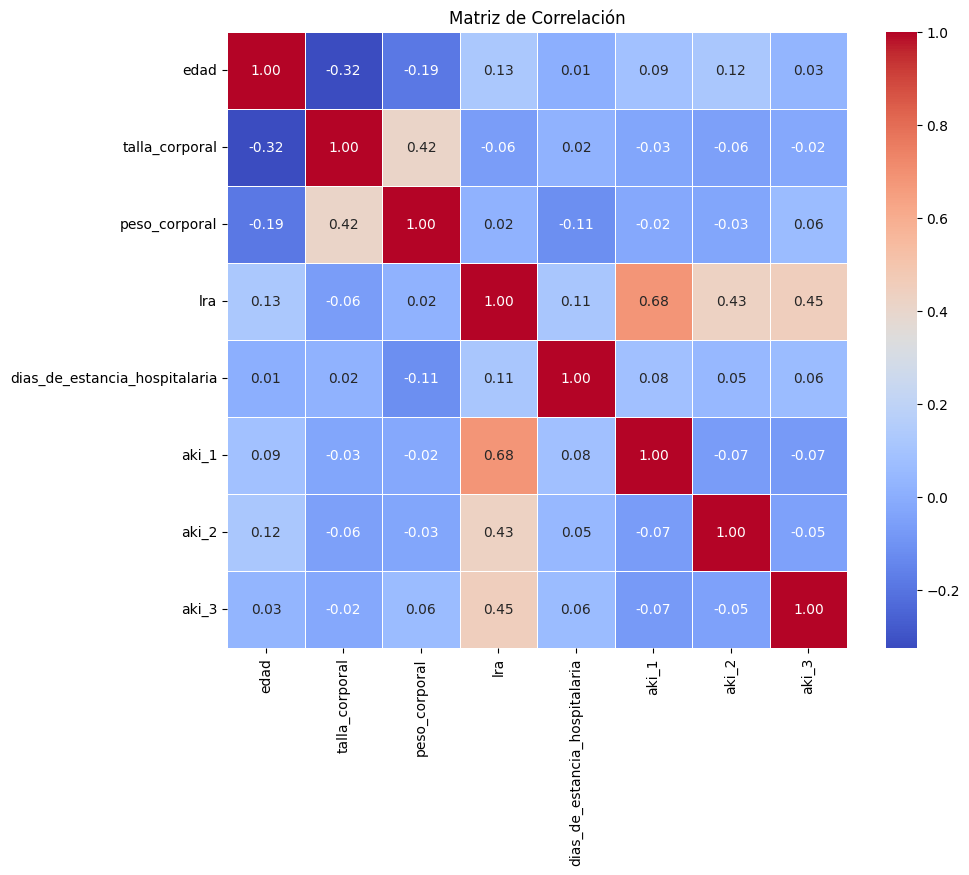

In [85]:
# Select only the numerical columns for correlation analysis
df_numeric = df_aki_corr.select_dtypes(include=np.number)

# Create the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Para la matriz de correlación tenemos que tener en cuenta que la variable objetivo es LRA. Acá observamos que la mayor correlación de esta variable se encuentra con los diferentes nivel de aki: 1, 2, 3. Estas tres las eliminamos más adelante ya que no van con el objetivo final que buscamos. Se podrían utilizar para otro ejercicio. Con respecto a las otras variables tenemos que, no hay correlaciones muy altas.

**Correlacion con arboles de decision**

Con los arboles de decision es posible evaluar la importancia de las variables en el modelo predcitivo

**Se crea el arbol de decision**

In [88]:
#Importar librerias
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [89]:
# Separar el conjunto de datos
X = aki_final.drop('lra', axis=1)
y = aki_final['lra']
#

In [93]:
# prompt: X aplicar get dummies

import pandas as pd
X = pd.get_dummies(X, drop_first=True)
X.head()

,edad,talla_corporal,peso_corporal,dias_de_estancia_hospitalaria,aki_1,aki_2,aki_3,sexo_Masculino,imc_mayor_a_30_No,imc_mayor_a_30_Si,...,"edad_bin_(10, 20]","edad_bin_(20, 30]","edad_bin_(30, 40]","edad_bin_(40, 50]","edad_bin_(50, 60]","edad_bin_(60, 70]","edad_bin_(70, 80]","edad_bin_(80, 90]","edad_bin_(90, 100]",_trr_hasta_7_dias_pop_Yes
0,75,160,45,22,0,0,0,True,True,False,...,False,False,False,False,False,False,True,False,False,False
1,71,165,90,60,0,0,0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,66,160,90,18,0,1,0,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,42,160,80,8,0,0,0,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,88,166,60,16,0,0,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [94]:
#dividir entrenamiento y prueba
X_train, X_test, y_train, y_test= train_test_split(
    X, y, train_size=0.8, random_state=123, shuffle=True)

In [95]:
# Creación del modelo
modelDtree_lra = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

In [96]:
# Entrenamiento del modelo
modelDtree_lra.fit(X_train ,y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [98]:
y_pred_lra = modelDtree_lra.predict(X_test)

In [100]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelDtree_lra.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False).head(10)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,aki_1,0.530240
5,aki_2,0.236910
6,aki_3,0.223232
46,"edad_bin_(10, 20]",0.007884
2,peso_corporal,0.001734
3,dias_de_estancia_hospitalaria,0.000000
0,edad,0.000000
1,talla_corporal,0.000000
8,imc_mayor_a_30_No,0.000000
9,imc_mayor_a_30_Si,0.000000


Se crea una árbol de decisión en la exploración de los datos para analizar finalmente cuales son las variables que tienen impacto en la prediccion.

En cuanto a las varibles edad , talla , peso e IMC los resultados son simuilares a la matriz de correlacion

Este hallazgo se tendra en cuenta para los futuros analisis

**Datos de prueba**

In [67]:
# dividir en forma aleatoria aki_final en dos conjuntos de datos , uno con el 90 % de los datos y otro con el 10 % de los datos

#from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (90% train, 10% test)
#train_df, test_df = train_test_split(aki_final, test_size=0.1, random_state=42) # random_state for reproducibility

# Now you have two DataFrames:
# - train_df: Contains 90% of the data for training.
# - test_df: Contains 10% of the data for testing.

#print("Training set shape:", train_df.shape)
#print("Testing set shape:", test_df.shape)


In [68]:
# Porcentaje de filas para la primera parte (por ejemplo, 90%)
percentage_first_part = 0.90

# Número de filas para la primera parte
n_rows_part1 = int(len(aki_final) * percentage_first_part)

# Obtener índices aleatorios para la primer parte
indices_part1 = aki_final.sample(n=n_rows_part1, random_state=123).index

# Obtener índices para la segunda parte (resto de las filas)
indices_part2 = aki_final.index.difference(indices_part1)

# Dividir el DataFrame en dos partes
aki_final_train = aki_final.loc[indices_part1]
aki_final_test = aki_final.loc[indices_part2]

In [69]:
print(aki_final_train.shape)
print(aki_final_test.shape)

(437, 34)
(49, 34)


**Valores atipicos para las variables de entrada**

In [70]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Crear un objeto LocalOutlierFactor con n_neighbors=10
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.1)

# Seleccionar las columnas numéricas para el análisis
numCols = ["edad", "talla_corporal", "peso_corporal"]
X = aki_final_train[numCols]

# Identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(X)

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos:', aki_final_train[outliers].index.tolist())

Indices de valores atípicos: [72, 427, 249, 159, 241, 131, 75, 55, 438, 317, 160, 367, 212, 284, 59, 369, 236, 432, 170, 246, 336, 37, 435, 71, 22, 337, 484, 218, 463, 152, 80, 108, 473, 115, 401, 112, 100, 364, 187, 384, 468, 153, 342, 270]


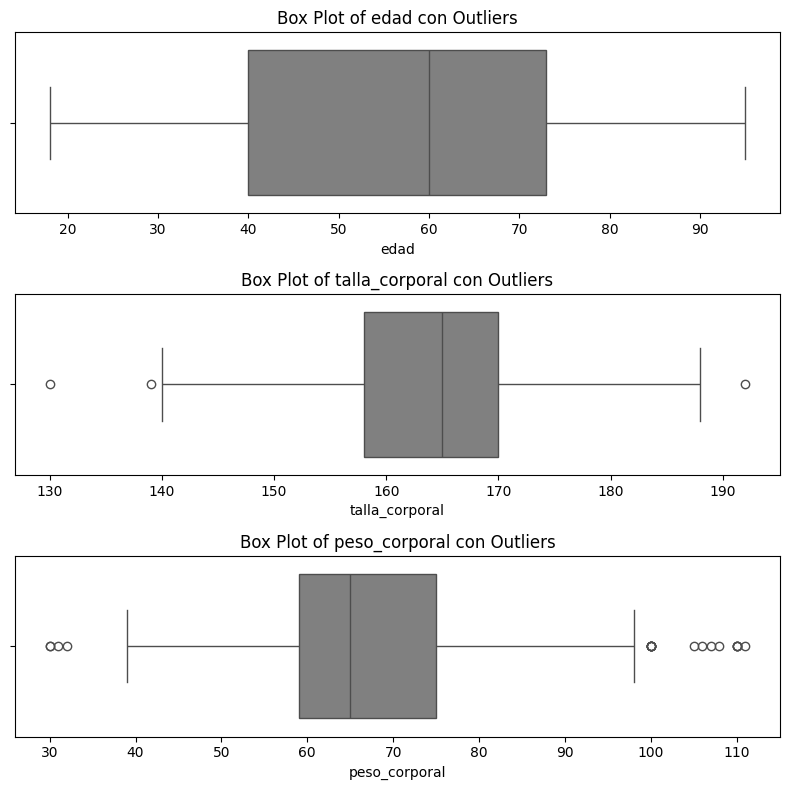

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que numCols contiene 3 variables numéricas
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))

# Itera sobre las columnas y ejes
for i, col in enumerate(numCols):
    sns.boxplot(x=aki_final_train[col], ax=axes[i], orient='h', color='gray', showfliers=True)
    axes[i].set_title(f'Box Plot of {col} con Outliers', fontsize=12)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


In [72]:
# prompt: hacer un data frame con los valores atipicos

# Filtrar el DataFrame original para obtener solo los valores atípicos
outliers_df = aki_final_train[outliers]

# Mostrar el DataFrame con los valores atípicos
print("\nDataFrame con valores atípicos:")
outliers_df


DataFrame con valores atípicos:


,edad,sexo,talla_corporal,peso_corporal,imc_mayor_a_30,dm2,hta,_ic_cronica,iam,erc,...,uci_pop_inmediato,transfusion_hemoderivados,uso_vasopresores,edad_bin,lra,dias_de_estancia_hospitalaria,_trr_hasta_7_dias_pop,aki_1,aki_2,aki_3
72,93,Femenino,140,50,No,No,Yes,No,No,No,...,No,Yes,No,"(90, 100]",0,10,No,0,0,0
427,41,Masculino,185,83,No,No,No,No,No,No,...,Yes,No,Yes,"(40, 50]",0,7,No,0,0,0
249,80,Masculino,170,98,Si,No,Yes,No,No,No,...,No,No,Yes,"(70, 80]",1,12,No,1,0,0
159,62,Femenino,150,80,Si,No,No,No,No,No,...,No,No,No,"(60, 70]",0,19,No,0,0,0
241,89,Femenino,158,30,No,No,Yes,No,No,No,...,No,Yes,Yes,"(80, 90]",1,27,No,0,1,0
131,72,Masculino,180,84,No,Yes,Yes,No,No,No,...,No,No,No,"(70, 80]",0,59,No,0,0,0
75,38,Femenino,167,44,No,No,No,No,No,No,...,Yes,Yes,Yes,"(30, 40]",0,72,No,0,0,0
55,55,Femenino,143,54,No,No,No,No,No,No,...,No,No,No,"(50, 60]",0,38,No,0,0,0
438,29,Masculino,188,65,No,No,No,No,No,No,...,No,No,No,"(20, 30]",0,35,No,0,0,0
317,61,Femenino,150,39,No,No,Yes,No,No,No,...,No,No,No,"(60, 70]",0,33,No,0,0,0


Revisando los valores atipicos , pueden ser posibles , por ejemplo el indice 72 , la edad es 93 años, puede corresponder a un valor atipico por el metodo de vecinos , pero puede corresponder a la edad del paciente

**Sobremuestreo**

In [73]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Crear un objeto RandomOverSampler

oversampler = RandomOverSampler()

# Se realiza el sobremuestreo para las variables de entrada y salida
X_resampled, y_resampled = oversampler.fit_resample(aki_final_train.drop('lra', axis=1), aki_final_train['lra'])

# Se crean dos dataframes con las variables de entrada y otro con la variable de salida a partir del proceso anterior
df1 = pd.DataFrame(X_resampled, columns=aki_final_train.columns.drop('lra'))
df2 = pd.DataFrame(y_resampled)

# Se concatenan los dataframes horizontalmente
df_balanced = pd.concat([df1, df2], axis=1)

df_aki=df_balanced

In [74]:
print(df_balanced.shape)
print(aki_final_train.shape)

(704, 34)
(437, 34)


El sobremuestro empero el desbalance de la variable target **lra**

**Sobremuestreo de la clase minoritaria (SMOTE)**

SMOTE (Synthetic Minority Over-sampling Technique), crea muestras sintéticas de la clase minoritaria

Genera datos sintéticos basados en vecinos cercanos, evitando duplicados exactos.

In [75]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Separar features (X) and target (y)
X = aki_final_train.drop('lra', axis=1)
y = aki_final_train['lra']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate through categorical columns and encode them
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = encoder.fit_transform(X[col])

# Aplicar SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar el balance
print("Distribución después de SMOTE:", y_resampled.value_counts())

Distribución después de SMOTE: lra
0    352
1    352
Name: count, dtype: int64


**Combinación de SMOTE + Submuestreo (SMOTEENN)**

In [76]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print("Distribución después de SMOTEENN:", y_resampled.value_counts())

Distribución después de SMOTEENN: lra
1    263
0    159
Name: count, dtype: int64


In [77]:
# Guardar el conjunto de datos con sobremuesreo
# Combinar X_resampled y y_resampled en un nuevo DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Guardar en un archivo CSV
balanced_data.to_csv('aki_final_train_balanced.csv', index=False)

print("Dataset balanceado guardado correctamente!")

Dataset balanceado guardado correctamente!


In [78]:
balanced_data.head(2)

,edad,sexo,talla_corporal,peso_corporal,imc_mayor_a_30,dm2,hta,_ic_cronica,iam,erc,...,uci_pop_inmediato,transfusion_hemoderivados,uso_vasopresores,edad_bin,dias_de_estancia_hospitalaria,_trr_hasta_7_dias_pop,aki_1,aki_2,aki_3,lra
0,27,0,165,60,0,0,0,0,0,0,...,0,0,0,1,38,0,0,0,0,0
1,67,0,156,60,1,1,0,0,0,0,...,1,0,1,5,11,0,0,0,0,0


In [79]:
# Opcional: Revertir LabelEncoder para columnas categóricas (si es necesario)
for col in X.select_dtypes(include=['object', 'category']).columns:
    balanced_data[col] = encoder.inverse_transform(balanced_data[col].astype(int))

# Guardar nuevamente (con valores categóricos originales)
balanced_data.to_csv('aki_final_train_balanced_decoded.csv', index=False)

**Guardar el conjunto de datos**

In [80]:
# guardar los data set aki_final_train y aki_final_test como excel

# aki_final_train to an Excel file
aki_final_train.to_excel('aki_final_train.xlsx', index=False)

#aki_final_test to an Excel file
aki_final_test.to_excel('aki_final_test.xlsx', index=False)


**Resumen**

**Conjunto de datos**

Cohorte de 500 pacientes llevados a cirugía no cardiaca en los que se determinó la incidencia a y los factores de riesgo de AKI post operatoria

La base de datos se construyó en Redcap
La base de datos final se exporta a un archivo excel.

Antes de subir la base de datos se eliminaron las columnas las columnas Record ID, Hospital de prácticas y Numero de historia clínica; para mantener la privacidad de los pacientes

**Preparación de los datos**

Las variables mortalidad a los 28 días, tienen gran cantidad de datos faltantes, 89 en total, no son de fácil imputación y como el objetivo es predecir la falla renal aguda se eliminaron estas variables.

En la variable sangrado mayor a 500 cc faltan 119 datos; el sangrado durante una cirugía está relacionado a factores del paciente como al tipo de cirugía. No se puede imputar por la moda, ni por vecinos cercanos. La información de esta variable está relacionada con la transfusión y el uso de vasopresores; los pacientes que se trasfunden son los que sangran más de 500 cc durante la cirugía y están con soporte vasopresor. Por esta razón se elimina la variable sangrado mayor.

Se elimino la variable proteinuria preoperatoria debido a que en el análisis estadístico previo no se asoció a AKI

La variable creatinina pop se utiliza para el diagnóstico de AKI por lo que su efecto ya está incluido en la variable LRA, por lo que se elimina.

Se modifican los valores de las variables LRA pop y estadios por valores 0 y 1, para hacerlas más entendibles y para ingresarlas al modelo.

Las variables estadio 1 por creatinina y estadio 1 por gasto urinario, se unifico en una sola variable: estadio 1; ya que indican el mismo nivel de severidad, pero por criterios diferentes. Se realizo la misma operación con estadio 2 y estadio 3.

La variable crisis hipertensiva solo tiene dos registros positivos, por lo que se elimina

**Imputaciones**

En las variables talla corporal, peso corporal y Creatinina POP se reemplazan los valores nulos por la mediana

Las variables categóricas tienen pocos valores nulos, por ejemplo, IAM 1, contraste endovenoso 1, falla cardiaca descompensada 2. Se decide eliminarlos.

**Dividir conjunto de datos**

El conjunto de datos después de las modificaciones se denomino AKI final y se divido en un 90 % para entrenar los modelos (aki_final_train) y un 10 % para la evaluación final de los modelos (aki_final_test)

**Valores atípicos para las variables de entrada**

 Se realizo por el método de vecinos cercanos. Al revisar los valores correspondientes en las variables evaluadas; edad, peso y talla, se encontró que eran valores posibles

**Sobremuestreo**

La variable de interes lesión renal aguda esta muy desbalanceada (437, 33). Se realizo un sobremuestreo con la técnica Randomoversampler, pero empero el imbalance (704,33).  
Se realizó un sobremuestreo con la técnica SMOTE, obtenido mejores resultados (352,352). Este conjunto de datos se guardó como aki_final_train_balanced


**OPCIONES DE MEJORA**

**CONJUNTO DE DATOS**

Se modifica aki final para dejar solo como varibale target lesion renal aguda.

Se eliminar esas columans en el archivo de excel antes de cargar y cosntruri el data frame

In [81]:
df= pd.read_excel("/content/aki modificado.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '/content/aki modificado.xlsx'

In [ ]:
df.head(2)

**Conteo en la variable objetivo LRA**

In [ ]:
print(df["LRA"].value_counts())

**Tecnica SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Separar features (X) and target (y)
X = df.drop('LRA', axis=1)
y = df['LRA']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate through categorical columns and encode them
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = encoder.fit_transform(X[col])

# Aplicar SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar el balance
print("Distribución después de SMOTE:", y_resampled.value_counts())

In [ ]:
# prompt: guardar el conjunto de datos resampled

import pandas as pd
# Crear un DataFrame a partir de los datos remuestreados
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['LRA'] = y_resampled

# Opcional: Revertir LabelEncoder si necesitas las etiquetas originales para guardar
# (Solo para las columnas que fueron codificadas)
for col in X.select_dtypes(include=['object', 'category']).columns:
    # Asegúrate de que la columna exista en el DataFrame remuestreado antes de decodificar
    if col in df_resampled.columns:
        # Utiliza el mismo encoder que se usó para codificar
        df_resampled[col] = encoder.inverse_transform(df_resampled[col].astype(int))


# Guardar el conjunto de datos remuestreado en un archivo (CSV o Excel)
df_resampled.to_csv('aki_resampled_smote.csv', index=False)
df_resampled.to_excel('aki_resampled_smote.xlsx', index=False)

print("\nConjunto de datos remuestreado (SMOTE) guardado como 'aki_resampled_smote.csv' y 'aki_resampled_smote.xlsx'")

# Mostrar las primeras filas del DataFrame remuestreado
print("\nPrimeras filas del DataFrame remuestreado:")
print(df_resampled.head())

# Verificar el tamaño del DataFrame remuestreado
print("\nForma del DataFrame remuestreado:", df_resampled.shape)

In [ ]:
df_resampled.head(2)